# Numpy
**Numpy** is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find Numpy very similar.

In [1]:
import numpy as np

## Arrays

A **numpy array** is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [2]:
a = np.array([1, 2, 3])   # Create a rank 1 array -> CONVERTIMOS DE LISTA A ARRAY
print(type(a))            # Prints "<class 'numpy.ndarray'>" -> LA CLASE HA CAMBIADO
print(a.shape)            # Prints "(3,)" -> NOS INDICA Q ES UN VECTOR CON TRES CASILLAS/POSICIONES
print(a[0], a[1], a[2])   # Prints "1 2 3"

<class 'numpy.ndarray'>
(3,)
1 2 3


In [3]:
a[0] = 5       # Change an element of the array -> PODEMOS MODIFICAR EL ARRAY
print(a)                  # Prints "[5, 2, 3]"

[5 2 3]


In [4]:
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array -> ARRAY DE DIMENSION 2, OJO TODO VA DENTRO DE CORCHETES, ES UNA LISTA DE LISTA POR ESO ES DE DIMENSION 2
print(b.shape)                     # Prints "(2, 3)" -> 2 FILAS 3 COLUMNAS, SIEMPRE ESE ORDEN
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4" -> VEMOS COMO ACCEDEMOS A CADA POSICION

(2, 3)
1 2 4


In [5]:
b

array([[1, 2, 3],
       [4, 5, 6]])

Some useful functions to create arrays:

In [6]:
a = np.zeros((2,2))   # Create an array of all zeros -> ASI PODEMOS CREAR ARRAYS INICIALIZANDO LA MATRIZ (CON CEROS)
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

[[0. 0.]
 [0. 0.]]


In [7]:
b = np.ones((2,2))    # Create an array of all ones -> IGUAL PERO CON UNOS
print(b)              # Prints "[[ 1.  1.]
                      #          [ 1.  1.]]"

[[1. 1.]
 [1. 1.]]


In [9]:
cte = 3
c = np.full((2,2), cte)  # Create a constant array
print(c)                 # Prints "[[ 1.  1.]
                         #          [ 1.  1.]]"

[[3 3]
 [3 3]]


In [10]:
3*np.ones((2,2))

array([[3., 3.],
       [3., 3.]])

In [11]:
d = np.eye(2)         # Create a 2x2 identity matrix -> CON EL DOS INDICAMOS LA DIMENSION DE LA MATRIZ INDENTIDAD(ES POR LA QUE SI MULTIPLICAMOS UNA MATRIZ EL RESULTADO ES LA MISMA MATRIZ)
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

[[1. 0.]
 [0. 1.]]


In [12]:
e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print anything of that shape


[[0.05627116 0.83153979]
 [0.76866804 0.75083839]]


In [13]:
f = np.random.randn(5)  # Difference w.r.t random.random?
print(f)                     #
    
    

[-0.88493267 -1.8900145  -0.08319504 -1.07024728  1.35100728]


In [14]:
#LA DIFERENCIA ENTRE UNA Y OTRA ESQUE RANDOM DISTRIBUYE VALORES UNIFORMES  Y RANDN DISTRIBUYE VALORES NORMALES

In [15]:
np.random?

#### Exercise

Create a sample of points that follow the equation $Y = AX + B$, where A = 2.5 and B = 20.

Plot it as either a cloud of points or a line.


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

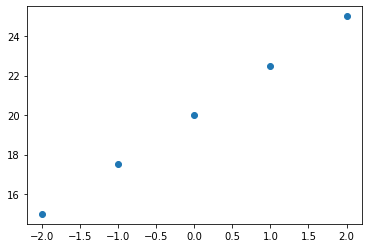

In [17]:
A = 2.5
B = 20
x = np.array([0,1,-1,2,-2])
y = A * x + B
plt.scatter(x,y)

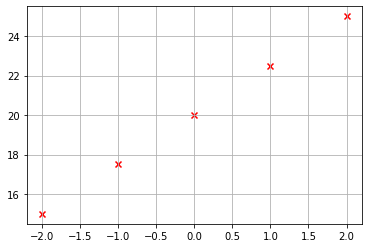

In [19]:
plt.scatter(x,y, marker='x', color='red')
plt.grid(True) #Me añade una cuadricula en el grafico

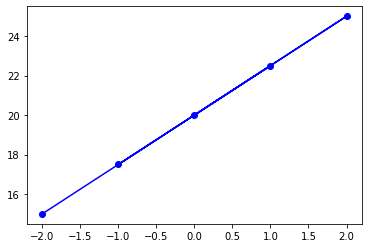

In [20]:
plt.plot(x,y,'b-o') #ME UNE LOS PUNTOS SEGUN LOS "ENCUENTRA" -> SE NOTA MAS SI LA ECUACION NO ES UNA LINEA

### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [24]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3] # FILAS DESDE LA CERO A LA DOS, Y COLUMNAS DE LA UNO A LA 3

In [25]:
lista = [1,2,3,4]
lista[:2]

[1, 2]

In [26]:
lista[1:3]

[2, 3]

In [27]:
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [28]:
b

array([[2, 3],
       [6, 7]])

In [29]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"

2


In [30]:
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

77


In [31]:
# LO IMPORTANTE DE ESTO ES, COMO B DEPENDE DE A, SI MODIFICO B TAMBN MODIFICO A

You can avoid this behavior, with .copy():

In [32]:
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
b = a[:2, 1:3].copy()
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is not the same piece of data as a[0, 1] anymore!
print(a[0, 1])   # Prints "2"

2
2


### More about slicing

In [33]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [34]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)


In [35]:
a[1,:]

array([5, 6, 7, 8])

We can make the same distinction when accessing columns of an array:

In [36]:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


### Boolean array indexing

**Boolean array indexing** lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [37]:
a = np.array([[1,2], [3, 4], [5, 6]])

In [38]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [39]:
a>2

array([[False, False],
       [ True,  True],
       [ True,  True]])

In [40]:
# TAMBN PUEDO GUARDARLO EN UNA VARIABLE BOOLEANA

In [41]:
bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"


[[False False]
 [ True  True]
 [ True  True]]


In [42]:
a

array([[1, 2],
       [3, 4],
       [5, 6]])

We use boolean array indexing to construct a rank 1 array
consisting of the elements of a corresponding to the True values
of bool_idx

In [85]:
print(a[bool_idx])  # Prints "[3 4 5 6]"

# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"
#LA FORMA LA PERDEMOS, NOS DEVUELVE ALGO NUEVO, NO TIENE NADA QUE VER CON LA MATRIZ ANTERIOR

[3 4 5 6]
[3 4 5 6]


In [86]:
kk = a[a > 2]
b = kk.reshape((2,2))

In [87]:
b

array([[3, 4],
       [5, 6]])

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [46]:
x = np.array([1, 2])   # Let numpy choose the datatype
print(x.dtype)         # Prints "int64"

int64


In [47]:
x = np.array([1.0, 2.0])   # Let numpy choose the datatype
print(x.dtype)             # Prints "float64"

float64


In [48]:
x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)  

int64


In [49]:
x = np.array([1, 2], dtype=np.complex) 

/tmp/ipykernel_3414/3164677107.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = np.array([1, 2], dtype=np.complex)


In [50]:
x

array([1.+0.j, 2.+0.j])

In [51]:
x = np.array([1.0+1j, 2+1j]) 

In [52]:
x

array([1.+1.j, 2.+1.j])

In [53]:
np.array([1,3,2.5,1+1j]).dtype

dtype('complex128')

## Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [54]:
x = np.array([[1,2],[3,4]], dtype=np.float64)# FORZAMOS QUE EL TIPO DE DATO DENTRO DEL ARRAY SEA FLOAT
y = np.array([[5,6],[7,8]], dtype=np.float64)

In [55]:
x

array([[1., 2.],
       [3., 4.]])

In [56]:
y

array([[5., 6.],
       [7., 8.]])

In [57]:
# Elementwise sum; both produce the array
# [[ 6.0  8.0]
#  [10.0 12.0]]
print(x + y)
#print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]


In [58]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
#print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]


In [59]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
#print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]


In [61]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
#print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [62]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that (unlike MATLAB), * is elementwise multiplication, not matrix multiplication. 

We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
np.dot?

In [63]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

In [64]:
# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [65]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [66]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is **sum**:

In [67]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [68]:
x

array([[1, 2],
       [3, 4]])

You can find the full list of mathematical functions provided by numpy in the [documentation](https://numpy.org/doc/stable/reference/routines.array-manipulation.html).

In [69]:
print(x.cumsum())
print(x.cumprod())

[ 1  3  6 10]
[ 1  2  6 24]


Of course, we also have available many different mathematical functions like *cos,sin,exp,ln,log...*

#### Exercise

Represent the logistic, or sigmoid, function between -20 and 20. Remember its formula is:

$$\displaystyle S(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}$$

_Hint_: you will need an X and a Y to plot against it. 


_Hint_: check out the function np.exp

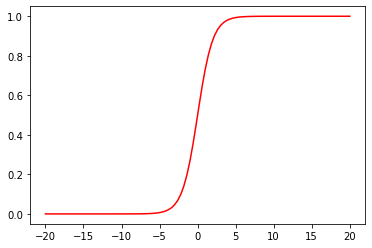

In [70]:
limit1 = 20
npoints = 100
#ESTO ES IMPORTANTE POR QUE ES LA RESOLUCION -> RES = LIMIT1*2/(NPOINTS-1) -> ES LA DISTANCIA QUE HAY ENTRE CADA PUNTO DE MIS X
x = np.linspace(limit1,-limit1, npoints)
y = np.exp(x) /(np.exp(x) + 1)
plt.plot(x,y,'r-');


(-20.0, 20.0)

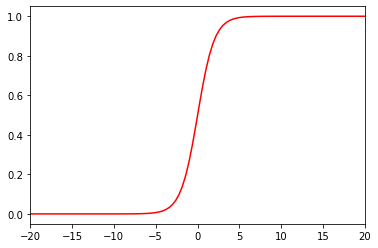

In [71]:
#otra forma
lim_visual = 20
plt.plot(x,y,'r-');
plt.xlim([-lim_visual, lim_visual])

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [72]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [73]:
# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[1 2 3]
[1 2 3]


In [74]:
v = np.array([[1,2,3]])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2 3]]
[[1]
 [2]
 [3]]


Numpy provides many more functions for manipulating arrays; you can see the full list in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.array-manipulation.html).







### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [75]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
#y = np.empty_like(x)   # Create an empty matrix with the same shape as x
y = np.zeros_like(x)

In [76]:
x

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [77]:
v

array([1, 0, 1])

In [78]:
[0,1,2,3]

[0, 1, 2, 3]

In [79]:
y.shape

(4, 3)

In [80]:
# Add the vector v to each row of the matrix x with an explicit loop
for i in range(y.shape[0]):# con y.shape[0] estamos sacando el numero de filas de y
    y[i, :] = x[i, :] + v

# Now y is the following
# [[ 2  2  4]
#  [ 5  5  7]
#  [ 8  8 10]
#  [11 11 13]]
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [81]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
The arrays can be broadcast together if they are compatible in all dimensions.
After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension
If this explanation does not make sense, try reading the explanation from the documentation or [this explanation](http://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the documentation.

Here are some applications of broadcasting:


In [82]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)

In [83]:
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:
# [[ 4  5]
#  [ 8 10]
#  [12 15]]
print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [84]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:
# [[2 4 6]
#  [5 7 9]]
print(x + v)

[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:
# [[ 5  6  7]
#  [ 9 10 11]]
print((x.T + w).T)# ESTA ES LA TRASPUESTA -> FILAS POR COLUMNAS

In [ ]:
# Another solution is to reshape w to be a column vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
# [[ 2  4  6]
#  [ 8 10 12]]
print(x * 2)

## Numpy Documentation
This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the numpy reference to find out much more about numpy.

# SciPy

Numpy provides a high-performance multidimensional array and basic tools to compute with and manipulate these arrays. SciPy builds on this, and provides a large number of functions that operate on numpy arrays and are useful for different types of scientific and engineering applications.

The best way to get familiar with SciPy is to browse the documentation. We will highlight some parts of SciPy that you might find useful for this class.

## Some practical DS related application: Image operations

SciPy provides some basic functions to work with images. For example, it has functions to read images from disk into numpy arrays, to write numpy arrays to disk as images, and to resize images. Here is a simple example that showcases these functions:

In [ ]:
from scipy.misc import imread, imsave, imresize #DEPRECATED

In [ ]:
!pip install imageio # CON LA ADMIRACION EJECUTO EN BASH

In [ ]:
!pip install opencv-python


#### First, get the cat!

In [ ]:
pic_url = 'https://upload.wikimedia.org/wikipedia/commons/2/22/Turkish_Van_Cat.jpg'

In [ ]:
! curl {pic_url} --output Turkish_Van_Cat.jpg

In [ ]:
# Install dependencies: pip install opencv-python
from io import BytesIO
import cv2
import numpy as np

# Read an JPEG image into a numpy array
filename = "Turkish_Van_Cat.jpg"
img = cv2.imread(filename)#LEO LA IMAGEN
cv2.imwrite('cat.jpg', img)#GUARDO LA IMAGEN
print(img.dtype, img.shape)  # Prints "uint8 (400, 248, 3)" IMPRIMO LA IMAGEN



In [ ]:
from IPython.display import Image
Image(filename='Turkish_Van_Cat.jpg')

In [ ]:
# We can tint the image by scaling each of the color channels
# by a different scalar constant. The image has shape (400, 248, 3);
# we multiply it by the array [1, 0.95, 0.9] of shape (3,);
# numpy broadcasting means that this leaves the red channel unchanged,
# and multiplies the green and blue channels by 0.95 and 0.9
# respectively.
img_tinted = img * [1, 0.5, 1]

# Resize the tinted image to be 300 by 300 pixels - Using cv2.resize
new_h, new_w = 300, 300
img_output = cv2.resize(img_tinted, dsize=(new_h, new_w), interpolation=cv2.INTER_CUBIC)

# Write the tinted image back to disk
img_output = np.uint8(img_output)
cv2.imwrite('cat_tinted.jpg', img_output)

In [ ]:
Image(filename='cat_tinted.jpg')

## Refs

* Main ref for explanations: https://cs231n.github.io/python-numpy-tutorial/#numpy
* Exercises from [YOGEN.io](http://yogen.io/)
* Numpy/scipy documentation:
    * https://numpy.org/doc/stable/reference/arrays.indexing.html
    * https://numpy.org/doc/stable/reference/arrays.dtypes.html
    * http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html
    * http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs
    * http://docs.scipy.org/doc/numpy/reference/
    * http://docs.scipy.org/doc/scipy/reference/index.html
 